In [1]:
#importing required modules
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd

In [2]:

iteration = 3 # Number of iterations
networks_sizes = [10, 20, 25, 30, 35, 40, 45] # A list of network sizes for simulations

In [3]:
# Defining three arrays to store simulation data in them:
permeability_array = np.zeros((len(networks_sizes),len(range(iteration))))
formationfactor_array = np.zeros((len(networks_sizes),len(range(iteration))))
porosity_array = np.zeros((len(networks_sizes),len(range(iteration))))

In [4]:
# defining a function that writes the input text file for porenetworks
def net_input(network, rt_dist):
        text_input =["Porenetworks % Base file \n",
                network,"\n",
                rt_dist,"\n",
                "100 100 0.3 2.0 % Min throat length, max throat length, delta exp, eta exp \n",
                "0 0 0.2 3.0 % Min aspect ratio, max aspect ratio, delta exp, eta exp \n",
                "0.001 0.04811 0.8 1.6 % Triangles: Min G, max G, delta exp, eta exp \n",
                "0 1 % Pores: proportion of square and circular pores \n",
                "0 1 % Throats: proportion of square and circular throats \n",
                "0 % Proportion of pore volume occupied by clay \n",
                "6 % Average connection number <= 6 \n",
                "T % Use periodic boundary conditions \n"]
        return text_input

In [5]:
# defining the parameters for different pore throat distributions we will use:
# Min throat radius, max throat radius, delta exp, eta exp
# this will sit in the text file that will be used as input for porenetworks
min_rt=[0.1]
max_rt=[20,100,200]
delta_rt=[0.2]
eta_rt=[6 ,18]
rt_dist_mat =[]
for min in range(len(min_rt)):
    for max in range(len(max_rt)):
        for delta in range(len(delta_rt)):
            for eta in range(len(eta_rt)):
                rt_dist = str(min_rt[min])+" "+str(max_rt[max])+" "+str(delta_rt[delta])+" "+str(eta_rt[eta])
                rt_dist_mat.append(rt_dist)
                
print(rt_dist_mat)

['0.1 20 0.2 6', '0.1 20 0.2 18', '0.1 100 0.2 6', '0.1 100 0.2 18', '0.1 200 0.2 6', '0.1 200 0.2 18']


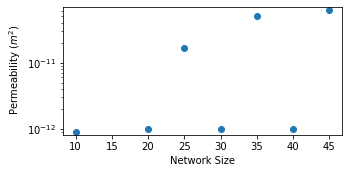

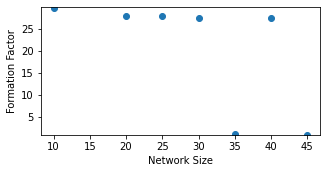

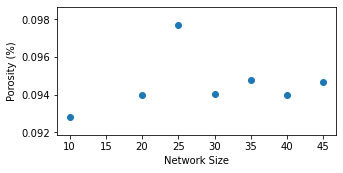

 For the pore-throat distribution Number  1  the output file name is: PoreDistNum_1__2022-12-18-18-43-18.csv


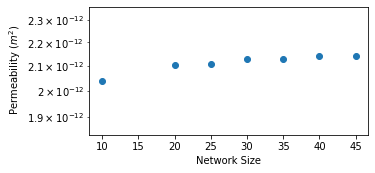

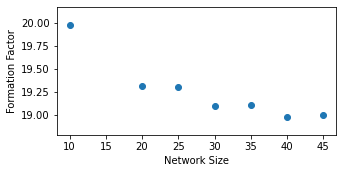

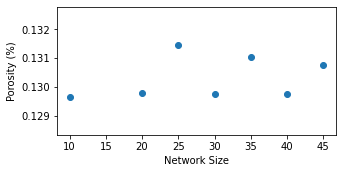

 For the pore-throat distribution Number  2  the output file name is: PoreDistNum_2__2022-12-18-18-50-26.csv


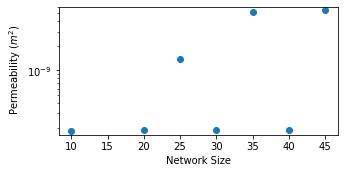

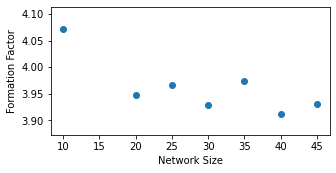

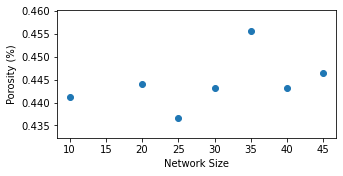

 For the pore-throat distribution Number  3  the output file name is: PoreDistNum_3__2022-12-18-18-58-41.csv


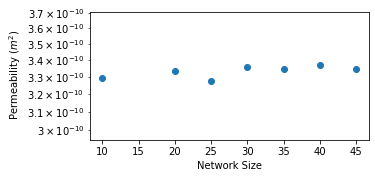

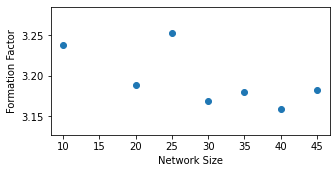

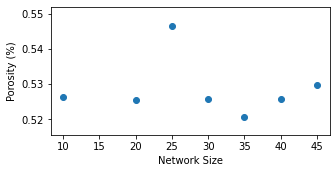

 For the pore-throat distribution Number  4  the output file name is: PoreDistNum_4__2022-12-18-19-05-34.csv


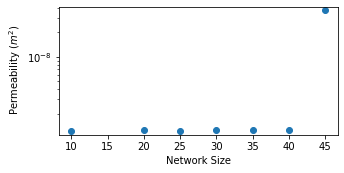

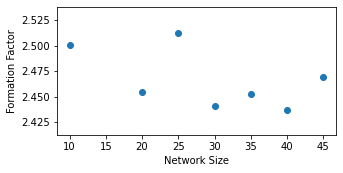

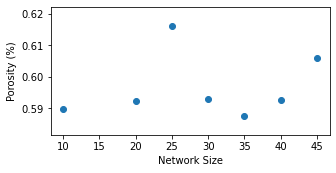

 For the pore-throat distribution Number  5  the output file name is: PoreDistNum_5__2022-12-18-19-12-26.csv


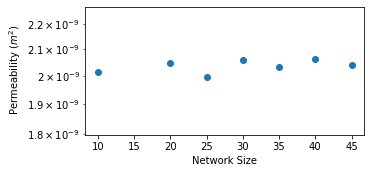

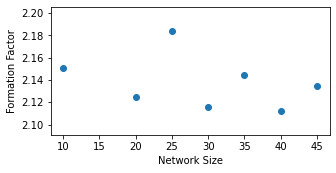

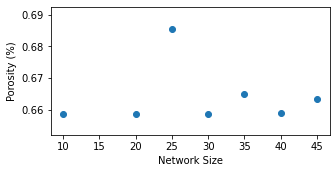

 For the pore-throat distribution Number  6  the output file name is: PoreDistNum_6__2022-12-18-19-19-11.csv


In [6]:
# running the simulation for different pore throat distributions. For loops will run for each pore throat distribution, network size, and iteration.
for dist in range(len(rt_dist_mat)):
    pore_throat= rt_dist_mat[dist]
    for i in range(len(networks_sizes)):
        for j in range(iteration):
            #creating network size string 
            network_3d= (str(networks_sizes[i])+ " ")*3
            input_text= net_input(network_3d,pore_throat)
            
            # writing input_text in 'netgenInput.dat'
            f= open("netgenInput.dat","w")
            f.writelines(input_text)
            f.close()
            
            # generating pore networks
            os.system("netgen_win32.exe netgenInput.dat")
            
            # simulating flow through generated porenetworks
            os.system("poreflow_win32.exe poreflowInput.dat")
            
            # reading the .prt output file from poreflow into separated lines
            output = open("poreflowInput.prt")
            output_lines = output.readlines()
            
            # putting NaN in case poreflow crashes and does not create the output file completely
            # locations for permeability, porosity, and formation factor lines in the output file are known and are used to read the values
            if len(output_lines) < 26:
                permeability_array[i][j] = np.nan
                porosity_array[i][j] = np.nan
                formationfactor_array[i][j] = np.nan
                
            # reading values from the output    
            elif "permeability" in output_lines[25].split():
                permeability_line = output_lines[25].split()
                permeability_array[i][j] = permeability_line[-1]
                porosity_line = output_lines[22].split()
                porosity_array[i][j] = porosity_line[-1]
                formationfactor_line = output_lines[26].split()
                formationfactor_array[i][j] = formationfactor_line[-1]
            else:
                permeability_line = output_lines[33].split()
                permeability_array[i][j] = permeability_line[-1]
                porosity_line = output_lines[30].split()
                porosity_array[i][j] = porosity_line[-1]
                formationfactor_line = output_lines[34].split()
                formationfactor_array[i][j] = formationfactor_line[-1]

    # getting mean values for each network size for permeability, porosity, and formation factor
    permeability_means = np.nanmean(permeability_array, axis=1)
    formationfactor_means = np.nanmean(formationfactor_array, axis=1)
    porosity_means = np.nanmean(porosity_array, axis=1)

    # Ploting permeability values
    subplots = plt.figure(figsize=(5, 8))
    plt.subplot(3, 1, 1)
    plt.scatter(networks_sizes, permeability_means)
    plt.xlabel('Network Size')
    plt.ylabel(' Permeability $(m^{2}$)')
    plt.ylim(0.9*np.min(permeability_means), 1.1*np.max(permeability_means))
    plt.yscale('log')

    # Ploting formation factor values
    plt.figure(figsize=(5, 8))
    plt.subplot(3, 1, 2)
    plt.scatter(networks_sizes, formationfactor_means)
    plt.xlabel('Network Size')
    plt.ylabel('Formation Factor')
    plt.ylim(0.99*np.min(formationfactor_means), 1.01*np.max(formationfactor_means))

    # Ploting porosity values
    plt.figure(figsize=(5, 8))
    plt.subplot(3, 1, 3)
    plt.scatter(networks_sizes, porosity_means)
    plt.xlabel('Network Size')
    plt.ylabel('Porosity (%)')
    plt.ylim(0.99*np.min(porosity_means), 1.01*np.max(porosity_means))
    plt.show()

    #creating a dictionary of results to be stored in pandas dataframe
    results_dict = {'Network Size':networks_sizes, 'Permeability $(m^{2}$)': permeability_means,'Porosity (%)':porosity_means, 'Formation Factor':formationfactor_means}
    #creating a pandas dataframe out of results dictionary
    df = pd.DataFrame(results_dict)

    #creating the 'csv_output' directory if it does not exists already
    if os.path.isdir('csv_output') == False:
        os.mkdir('csv_output')
        
    #creating the name of the csv file based on the pore-throat distribution number and the date and time of the simulation
    start_time= datetime.datetime.now() # we use this date and time for the name of our output file to avoid overwriting the previous output files
    file_name = 'PoreDistNum_'+ str(dist+1) +'__'+ start_time.strftime("%Y-%m-%d-%H-%M-%S") + '.csv'
    print(' For the pore-throat distribution Number ', dist+1,' the output file name is:',file_name)

    #exporting the dataframe into a csv file in the 'csv_output' directory
    file_path = 'csv_output/'+ file_name 
    df.to_csv(file_path, index=False)
    df.head(3)

